In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
from matplotlib import cm as c

from torchvision import datasets, transforms

/tmp/ipykernel_102836/3938489315.py:8: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [4]:
transform = transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

model = CSRNet()

#define model
model = model.cuda()


base_path = '/home/jthe/Dev/project/roofcounting/'
model_filename = '0model_best.pth.tar'
model_path = os.path.join(base_path, model_filename)
#load trained weights
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [10]:
image_folder_path = "data/train_data/images/"
image_filename = "Image_7"
image_ext = ".png"
image_filename = image_filename + image_ext
image_path = os.path.join(base_path, image_folder_path, image_filename)

img = transform(Image.open(image_path).convert('RGB')).cuda()

In [11]:
output = model(img.unsqueeze(0))
print("Predicted Count : ", int(output.detach().cpu().sum().numpy()))

Predicted Count :  231


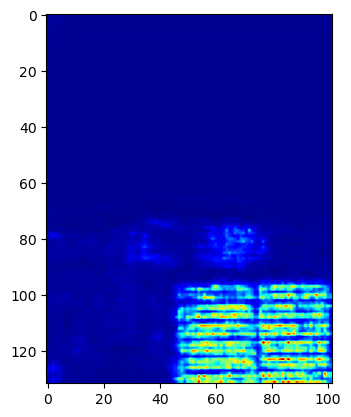

In [12]:
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp, cmap = c.jet)
plt.show()

Original Count :  244


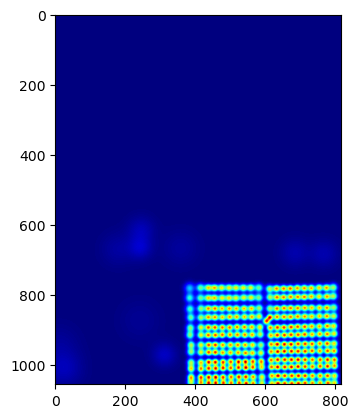

In [15]:
h5_folder_path = "data/train_data/ground_truth"
h5_filename = image_filename.replace(".png", "")
h5_ext = ".h5"
h5_filename = h5_filename + h5_ext
h5_path = os.path.join(base_path, h5_folder_path, h5_filename)
temp = h5py.File(h5_path, 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)

In [16]:
plt.show()
print("Original Image")

Original Image


In [ ]:
img_path = "data/train_data/images"
h5_filename = image_filename.replace(".png", "")
h5_ext = ".h5"
h5_filename = h5_filename + h5_ext
h5_path = os.path.join(base_path, h5_folder_path, h5_filename)

plt.imshow(plt.imread('dataset/Shanghai/part_A_final/test_data/images/IMG_100.jpg'))
plt.show()